# FLIP (00): Data Science 
**(Module 03: Linear Algebra)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

## Session 9 Linear Systems and Condition Numbers

# Linear Systems and Condition Numbers

In [ ]:
%matplotlib inline

## The problem

We are interested in solving linear systems of equations which we write in the form

\begin{equation}
  A {\bf x} = {\bf b},
\end{equation}

where $A$ is a known matrix, ${\bf b}$ a known vector, and ${\bf x}$ is the unknown solution vector that we are trying to find. By convention the system has size $n$ - that is, the matrix has size $n \times n$ and the vectors are column vectors length $n$.

Before attempting to solve the linear system, we recall that not all linear systems can be solved. If the matrix is singular, which is equivalent to $\det(A) = 0$, then the matrix cannot be inverted, and there is no solution. 

Now consider the accuracy with which the coefficients of $A$ and ${\bf b}$ can be known. Real numbers cannot be stored on a computer to infinite precision, so the coefficients cannot be accurate beyond, for example, 16 significant figures. In most interesting cases even this is too optimistic: the coefficients of $A$ and ${\bf b}$ will usually be the result of some other numerical or experimental procedure with its own inherent inaccuracies. 

This implies one crucial point. There may be linear systems defined by $\left( A, {\bf b} \right)$ that we do not want to solve, as it is _impossible_ to be sure that the solution is sufficiently accurate. That is, a "small" change in the coefficients of e.g. $A$, can lead to a "large" change in the solution. We would usually interpret "small" to mean within the accuracy with which we know the coefficients. What "large" means depends on the accuracy we require on the solution, and is problem dependent.

If the linear system does have a reliable solution - that is, small changes in the coefficients lead to small changes in the solution - we call it **well conditioned**. If it does not, we call it **badly conditioned**. If the linear system is badly conditioned then it cannot be reliably solved: find a different problem.

## Condition Numbers

We cannot, practically, solve not just one linear system, but many neighbouring problems, just to check if the system is reasonable. Instead we want a simple criterion that we can cheaply check to see whether it is worth solving the linear system. We can condense this down to a single number, called the **condition number**.

### Determinants

Why not use the determinant as the condition number? After all, if the determinant is zero the matrix cannot be inverted. However, consider the following matrix:

\begin{equation}
  A = 10^{-1} \begin{pmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \ddots & \vdots \\ \vdots & \ddots & \ddots & 0 \\ 0 & \dots & 0 & 1 \end{pmatrix}.
\end{equation}

This diagonal matrix is trivially inverted and perfectly well behaved, no matter how large. However, $\det(A) = 10^{-n}$, which is arbitrarily small for sufficiently large $n$. So the determinant cannot be a good condition number.

### Perturbations

Instead, let us consider what happens if we perturb the coefficients. For simplicity, just perturb the coefficients of the matrix. We do this by considering the matrix $A + \epsilon F$, where $F$ is some arbitrary matrix and $\epsilon$, assumed small, is the "size" of the perturbation. Now the solution will depend on the perturbation: write the solution as ${\bf x}(\epsilon)$. So the problem we are looking to solve is

\begin{equation}
  \left( A + \epsilon F \right) {\bf x}(\epsilon) = {\bf b}.
\end{equation}

We are interested in how much the solution changes as we vary $\epsilon$, or in particular the difference between the "true" solution (when $\epsilon = 0$) and the perturbed solution. Using Taylor expansion (about $\epsilon = 0$) we can write

\begin{equation}
  {\bf x}(\epsilon) - {\bf x}(0) = \epsilon \left. \dot{\bf x} \right|_{\epsilon = 0} + {\cal O} \left( \epsilon^2 \right).
\end{equation}

Going back to the definition of the problem we see

\begin{align}
  && \left( A + \epsilon F \right) \dot{\bf x} + F {\bf x} & = 0 \\
  \implies && \left. \dot{\bf x} \right|_{\epsilon = 0} &= - A^{-1} F {\bf x}(0) + {\cal O} \left( \epsilon \right).
\end{align}

Therefore the *absolute* error induced by the perturbation is

\begin{equation}
  {\bf x}(\epsilon) - {\bf x}(0) = -\epsilon A^{-1} F {\bf x}(0) + {\cal O} \left( \epsilon^2 \right).
\end{equation}

More interesting is the size of the relative error, which is

\begin{equation}
  \frac{\| {\bf x}(\epsilon) - {\bf x}(0) \|}{\| {\bf x} \|} \sim \epsilon \| A^{-1} F \| \sim \| A^{-1} \| \| A \| \left( \epsilon \frac{\| F \|}{\| A \|} \right).
\end{equation}

The final form groups the terms into those we know, or can control (which is just the matrix $A$), and those we do not (the terms corresponding to the perturbation, which are $\epsilon$ and $F$). The unknown terms are also scaled to be dimensionless by "dividing" the unknown $F$ by the known $A$.

This final form gives us our condition number: it is the piece that we can calculate

\begin{equation}
  K(A) = \| A^{-1} \| \| A \|.
\end{equation}

However, we have not yet determined how to compute the "magnitude" or "norm" of a matrix, $\| A \|$.

## Vector and matrix norms

### Vector norms

A norm is a mathematical distance function. Standard norms for e.g. real vectors use the sizes of the components or the "length" of the vector. The most useful for our purposes are the $1, 2$- and $\infty$-norms:

\begin{align}
  \| x \|_{1} & = \sum_{j = 1}^n | x_j |, \\
  \| x \|_{2} & = \sqrt{\sum_{j = 1}^n ( x_j )^2}, \\
  \| x \|_{\infty} & = \max_{j} | x_j |.
\end{align}

For example, the $2$-norm is the "standard" Pythagorean distance.

Note that different norms give different answers when applied to the *same* vector. For example, if ${\bf x} = (-1, 2, 1)$ then

\begin{align}
  \| x \|_{1} & = |-1| + |2| + |1| && = 4, \\
  \| x \|_{2} & = \sqrt{(-1)^2 + (2)^2 + (1)^2} && = \sqrt{6}, \\
  \| x \|_{\infty} & = \max_{j} \left(|-1|, |2|, |1| \right) && = 4.
\end{align}

Hence, when comparing norms of different vectors, it is necessary to always use the same norm.

As an illustration of the different norms, let us restrict to 2 dimensional vectors (which are easy to visualize) and plot all vectors with norm 1 for each of these three norms.

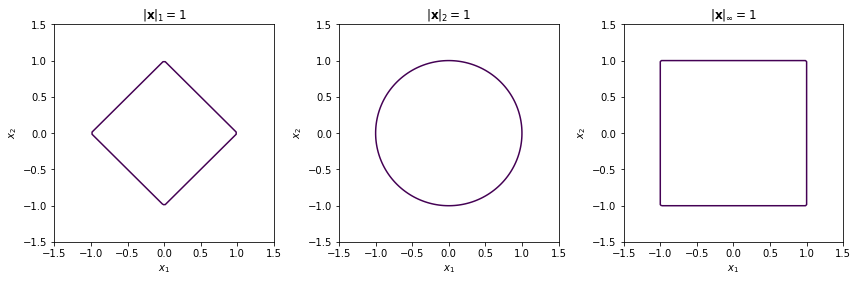

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

x1 = np.linspace(-1.5, 1.5, 100)
x2 = x1
[X, Y] = np.meshgrid(x1, x2)

N1   = np.zeros_like(X)
N2   = np.zeros_like(X)
Ninf = np.zeros_like(X)

for i in range(len(x1)):
    for j in range(len(x1)):
        v = np.array([x1[i], x2[j]])
        N1[i, j]   = la.norm(v, 1)
        N2[i, j]   = la.norm(v, 2)
        Ninf[i, j] = la.norm(v, np.inf)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.contour(X, Y, N1, levels = [1])
plt.title(r"$\| {\bf x} \|_{1} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.subplot(1, 3, 2)
plt.contour(X, Y, N2, levels = [1])
plt.title(r"$\| {\bf x} \|_{2} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.subplot(1, 3, 3)
plt.contour(X, Y, Ninf, levels = [1])
plt.title(r"$\| {\bf x} \|_{\infty} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.tight_layout(pad = 1.0)

plt.show()

### Matrix Norms

We really want matrix norm, $\| A \|$. We can use any vector ${\bf y}$ combined with any vector norm to *induce* a matrix norm by defining

\begin{equation}
  \| A \|_{\bf y} = \| A {\bf y} \|
\end{equation}

where the norm on the right hand side is a vector norm. Of course, this definition depends on the choice of vector ${\bf y}$. So we could maximize over *all* vectors ${\bf y}$: however, the size of the norm depends on the size of the vector. Therefore we want to take the magnitude of the vector ${\bf y}$ out: we define the **induced matrix norm** as

\begin{equation}
  \| A \| = \max_{{\bf y}: \| {\bf y} \| = 1} \| A {\bf y} \|.
\end{equation}

Throughout this definition, all norms *must* be the same. For example, the matrix $2$-norm is given by

\begin{equation}
  \| A \|_2 = \max_{{\bf y}: \| {\bf y} \|_2 = 1} \| A {\bf y} \|_2.
\end{equation}

Actually hand calculating the matrix norm using this definition is obviously difficult. However, it can be shown that two particular norms can be greatly simplified. That is

1. the matrix $1$-norm is given by the maximum of the $1$-norm of the *column* vectors of $A$;
2. the matrix $\infty$-norm is given by the maximum of the $1$-norm of the *row* vectors of $A$.

Note that, in contrast to everything else in this section, the $1$-norm is used for the vectors in both cases.

## Condition number

Formally we now have all the tools needed to compute our condition number. Again the condition number depends on the norm used in its calculation, but we would expect that all results have a similar magnitude.

Loosely we interpret the condition number to measure *the amount that inverting the matrix will increase any intrinsic error in the coefficients*.

More precisely, we can look at the relative error that we can measure: the *weighted residual*

\begin{equation}
  {\cal E} = \frac{\| A {\bf x}_{\text{num}} - {\bf b}\|}{\| {\bf b} \|}.
\end{equation}

Here ${\bf x}_{\text{num}}$ is the numerical solution. In principle, the weighted residual could be minimized, but we can never guarantee that it is precisely zero.

Now, it can be shown that

\begin{equation}
  \frac{1}{K(A)} {\cal E} \le \frac{\| {\bf x}_{\text{num}} - {\bf x}_{\text{exact}} \|}{\| {\bf x}_{\text{exact}} \|} \le K(A) {\cal E}.
\end{equation}

The lower bound is not important here: the point is the upper bound. Assume we have minimized the weighted residual to, for example, $10^{-16}$. Then, if the condition number is $\sim 10^{15}$ then the best bound on the relative error is $\sim 0.1$: in other words, we can only guarantee the correctness of the *first* significant digit of our solution!